In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
import math as m
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('cardio_train.csv', sep='\;', engine='python')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [4]:
df=df.drop('id', axis=1)

In [5]:
df.rename(columns={'cardio':'target'}, inplace=True)

In [6]:
df['age']=df['age']/365.24    #Col 'age' has days, hence dividing by 365.24 days(no. of days in a year)
df['age']=(round(df['age']))  #Rounding off age, and converting age into an integer
df.head()                       

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target
0,62.0,1,155,69.0,130,80,2,2,0,0,1,0
1,40.0,1,163,71.0,110,70,1,1,0,0,1,1
2,60.0,1,165,70.0,120,80,1,1,0,0,1,0
3,40.0,2,165,85.0,120,80,1,1,1,1,1,0
4,64.0,1,155,62.0,120,80,1,1,0,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69301 non-null  float64
 1   gender       69301 non-null  int64  
 2   height       69301 non-null  int64  
 3   weight       69301 non-null  float64
 4   ap_hi        69301 non-null  int64  
 5   ap_lo        69301 non-null  int64  
 6   cholesterol  69301 non-null  int64  
 7   gluc         69301 non-null  int64  
 8   smoke        69301 non-null  int64  
 9   alco         69301 non-null  int64  
 10  active       69301 non-null  int64  
 11  target       69301 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.3 MB


In [8]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,53.304007,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,6.760527,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Here Standard Deviation of Age, Height, Weight, ap_hi (Systolic BP), ap_lo(Diastolic BP) is considerably large. Hence, there is a possibility that these features might have outliers.

In [9]:
f_list=["age","height","weight","ap_hi","ap_lo"]
def Standardization(df):
    x_std=df.copy(deep=True)
    for feature in f_list:
        x_std[feature]=(x_std[feature]-x_std[feature].mean())/x_std[feature].std()
    return x_std
x_std=Standardization(df)
x_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,target
0,1.286289,1,-1.140991,-0.361737,0.007562,-0.088051,2,2,0,0,1,0
1,-1.967895,1,-0.166016,-0.222688,-0.121657,-0.140934,1,1,0,0,1,1
2,0.990454,1,0.077728,-0.292212,-0.057048,-0.088051,1,1,0,0,1,0
3,-1.967895,2,0.077728,0.750652,-0.057048,-0.088051,1,1,1,1,1,0
4,1.582124,1,-1.140991,-0.848406,-0.057048,-0.088051,1,1,0,0,1,0


In [10]:
x_melt=pd.melt(frame=x_std, id_vars="target", value_vars=f_list, var_name="features", value_name="value", col_level=None)
x_melt         #melting the dataframe so that it can be presented in a multi box plot representation

,target,features,value
0,0,age,1.286289
1,1,age,-1.967895
2,0,age,0.990454
3,0,age,-1.967895
4,0,age,1.582124
...,...,...,...
346500,0,ap_lo,-0.088051
346501,1,ap_lo,-0.035168
346502,1,ap_lo,-0.035168
346503,1,ap_lo,-0.088051


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'height'),
  Text(2, 0, 'weight'),
  Text(3, 0, 'ap_hi'),
  Text(4, 0, 'ap_lo')])

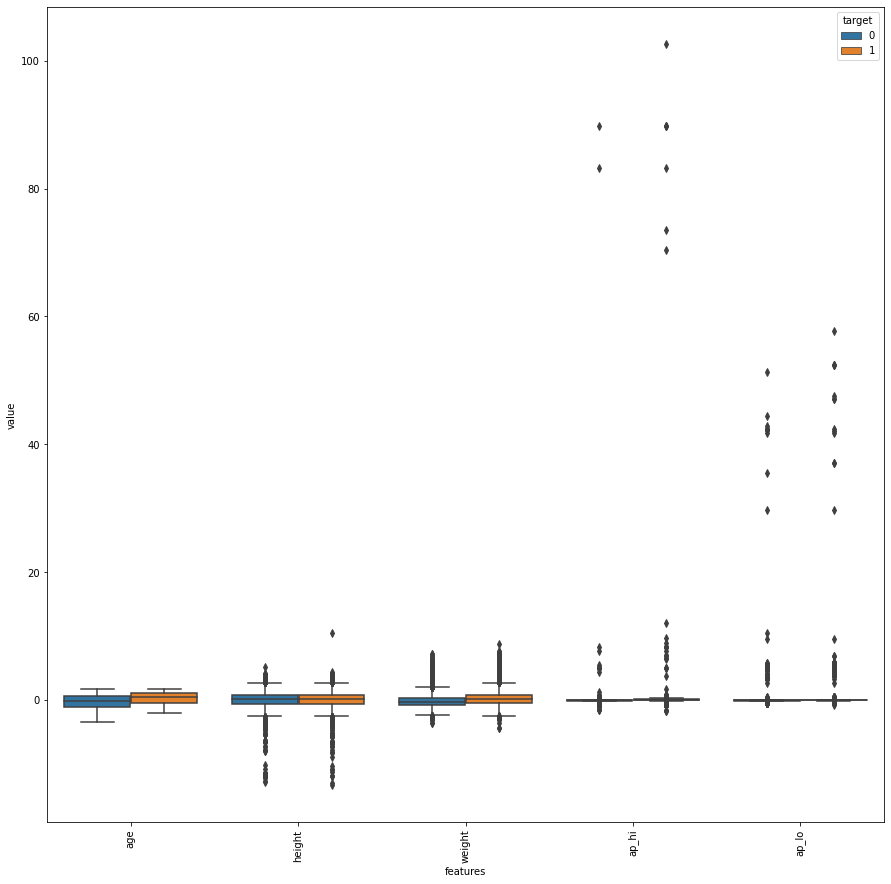

In [11]:
plt.figure(figsize=(15,15))
sb.boxplot(x="features", y="value", hue="target", data=x_melt)
plt.xticks(rotation=90)

In [12]:
ap_list=["ap_hi","ap_lo"]
bound= pd.DataFrame(index=["lower_bound","upper_bound"])
for ap in ap_list:
    Q1=df[ap].quantile(0.25)
    Q3=df[ap].quantile(0.75)
    IQR=Q3-Q1
    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    bound[ap] = [lower_bound, upper_bound ]
bound

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


Outliers for Systolic- 170mm Hg(upper) and above
for Diastolic- 105mm Hg(upper) and above

In [13]:
ap_hi_boundary=(df["ap_hi"]>bound["ap_hi"][1])
ap_lo_boundary=(df["ap_lo"]>bound["ap_lo"][1])
ap_outliers=(ap_hi_boundary | ap_lo_boundary)
df_outliers=df[ap_outliers]
df_outliers["target"].value_counts()

1    1999
0     385
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

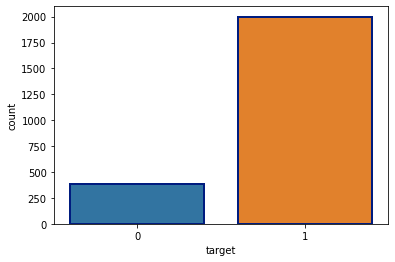

In [14]:
sb.countplot(x='target',data=df_outliers,linewidth=2,edgecolor=sb.color_palette("dark", 1))

In [15]:
out_filter = ((df["ap_hi"]>171) | (df["ap_lo"]>106) )
df =df[~out_filter]

<AxesSubplot:>

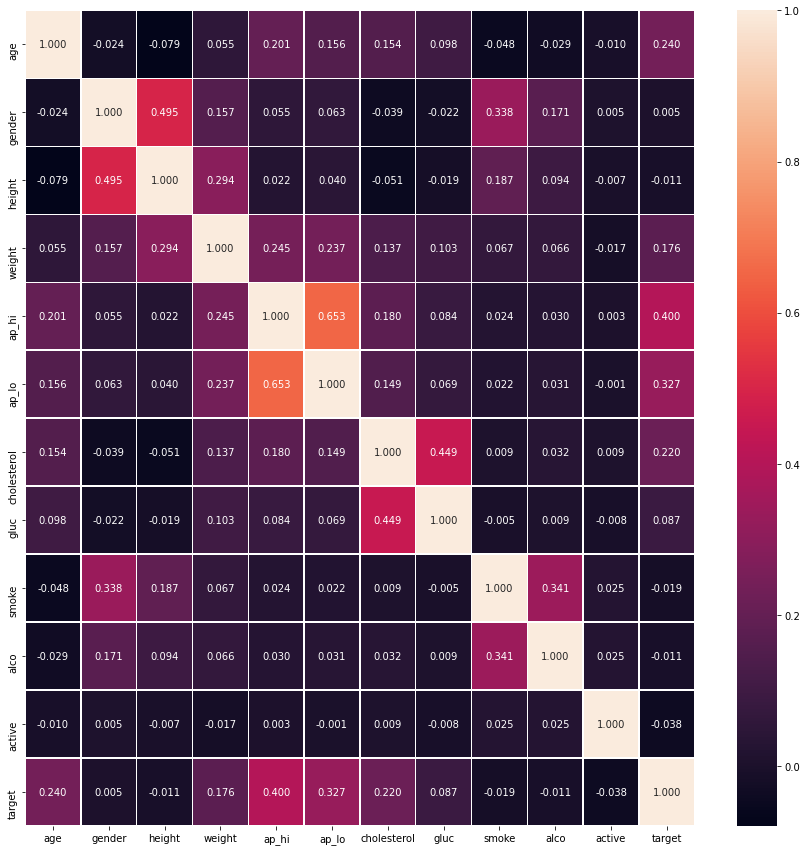

In [16]:
correlation = df.corr()
f, ax = plt.subplots(figsize = (15,15))
sb.heatmap(correlation, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

As seen in the heatmap, Age, Weight, Blood Pressure(ap_hi and ap_lo), Cholestrol and Glucose have a significant influence over cardiovascular disease

In [17]:
df_encoded=pd.get_dummies(df, columns=['gender','cholesterol','gluc','smoke','alco','active'])
x_features=df_encoded.drop('target', axis=1).copy()
x_features.head()

,age,height,weight,ap_hi,ap_lo,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,62.0,155,69.0,130,80,1,0,0,1,0,0,1,0,1,0,1,0,0,1
1,40.0,163,71.0,110,70,1,0,1,0,0,1,0,0,1,0,1,0,0,1
2,60.0,165,70.0,120,80,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,40.0,165,85.0,120,80,0,1,1,0,0,1,0,0,0,1,0,1,0,1
4,64.0,155,62.0,120,80,1,0,1,0,0,1,0,0,1,0,1,0,0,1


In [18]:
y=df_encoded['target'].copy()

In [19]:
x_scaled=scale(x_features)

In [20]:
pca = PCA(n_components=0.95)
pca.fit(x_scaled)
reduced = pca.transform(x_scaled)

In [21]:
per_var=np.round(pca.explained_variance_ratio_*100, decimals=2)
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

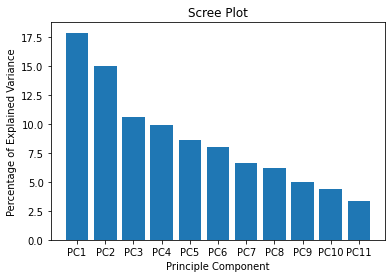

In [22]:
plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principle Component')
plt.title('Scree Plot')
plt.show()

In [23]:
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]  # Index of the most important feature on EACH component

In [24]:
initial_feature_names = x_features.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

In [25]:
PCA_df = pd.DataFrame(dic.items(), columns=['Principal Component', 'Feature'])
PCA_df  #List of important features in the dataset(that make up 95% variance of the dataset)

,Principal Component,Feature
0,PC0,smoke_1
1,PC1,cholesterol_1
2,PC2,active_0
3,PC3,alco_0
4,PC4,ap_hi
5,PC5,cholesterol_2
6,PC6,smoke_1
7,PC7,gluc_2
8,PC8,age
9,PC9,age


<AxesSubplot:>

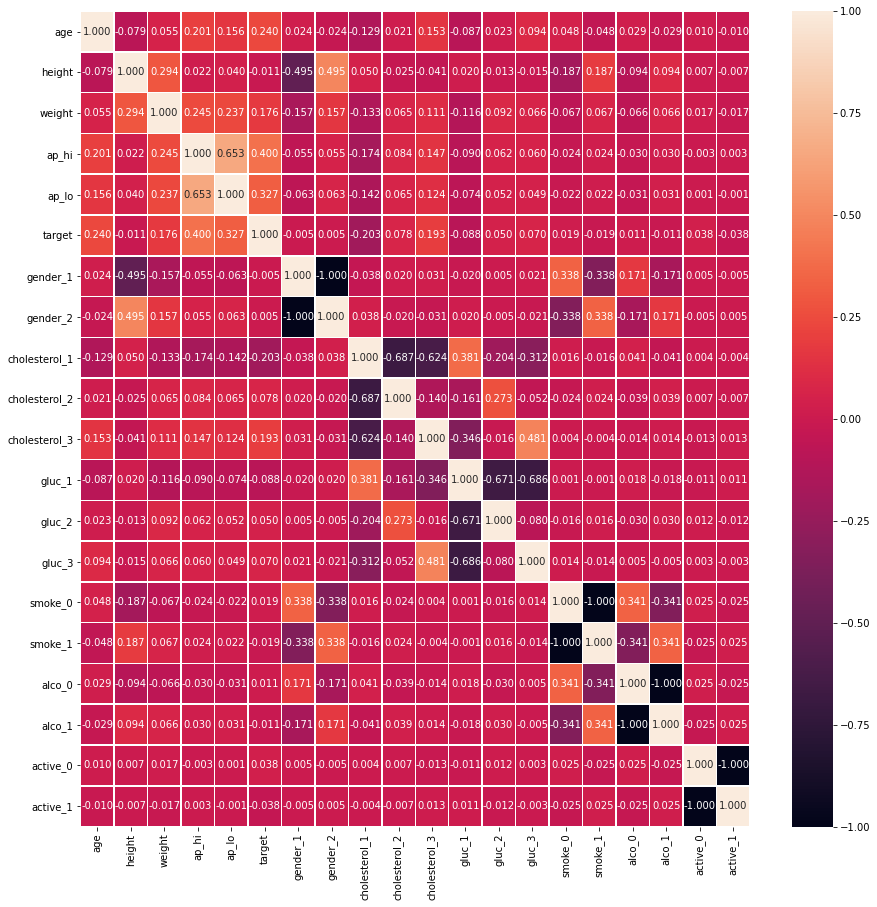

In [26]:
correlation2=df_encoded.corr()
f, ax = plt.subplots(figsize = (15,15))
sb.heatmap(correlation2, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

Trying to find BMI

In [27]:
def bmi_calculator(w, h):
    return w/(h**2)

In [28]:
df_encoded["bmi"] = df_encoded["weight"]/ ((df_encoded["height"])/100)**2

In [29]:
df_encoded.head()

,age,height,weight,ap_hi,ap_lo,target,gender_1,gender_2,cholesterol_1,cholesterol_2,...,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1,bmi
0,62.0,155,69.0,130,80,0,1,0,0,1,...,0,1,0,1,0,1,0,0,1,28.720083
1,40.0,163,71.0,110,70,1,1,0,1,0,...,1,0,0,1,0,1,0,0,1,26.722873
2,60.0,165,70.0,120,80,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,25.711662
3,40.0,165,85.0,120,80,0,0,1,1,0,...,1,0,0,0,1,0,1,0,1,31.221304
4,64.0,155,62.0,120,80,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,25.806452


In [30]:
print(len(df_encoded.loc[(df_encoded["bmi"])>40]))

1660


Considering bmi less than 40, as cardiovascular disease might be caused due to being excessively obese with bmi more than 40

In [31]:
df_cleaned=df_encoded.loc[(df_encoded['bmi'])<40]

In [32]:
print(len(df_cleaned.loc[(df_cleaned["bmi"])>40]))

0


<AxesSubplot:>

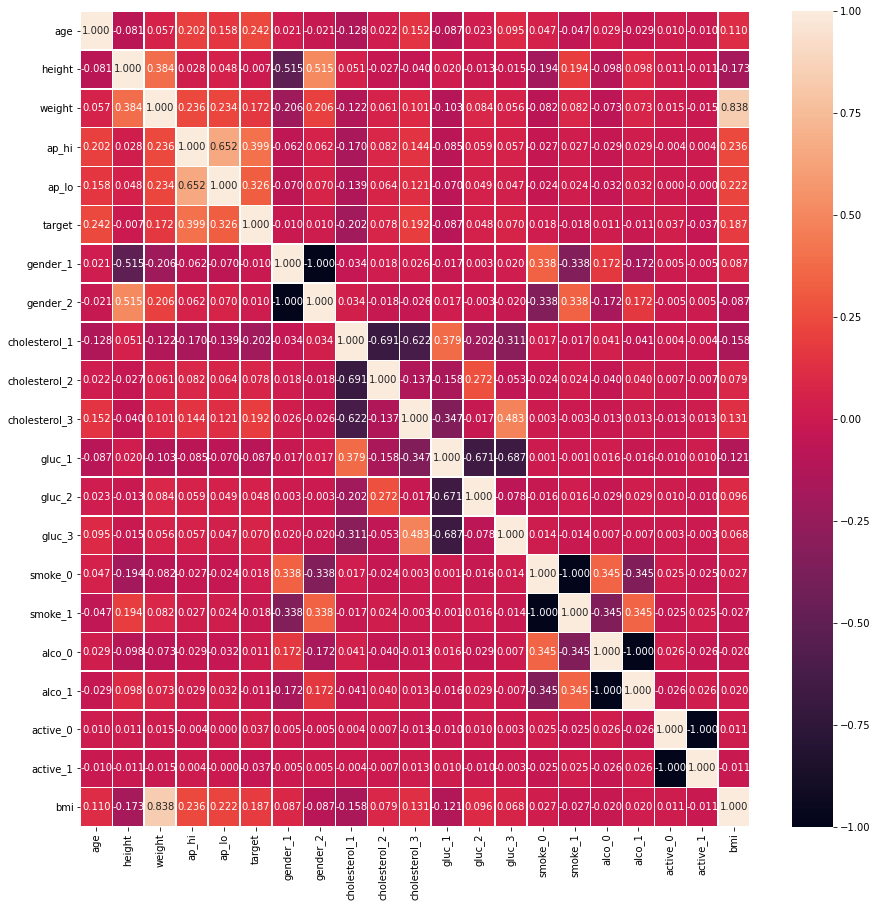

In [33]:
correlation3=df_cleaned.corr()
f, ax = plt.subplots(figsize = (15,15))
sb.heatmap(correlation3, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [34]:
drop_list=['height','gender_1','cholesterol_1','gluc_1','smoke_1','alco_1','active_1','weight']

In [35]:
for i in df_cleaned.columns:
    if i in drop_list:
        df_cleaned=df_cleaned.drop(i, axis=1)
df_cleaned.head()

,age,ap_hi,ap_lo,target,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_0,alco_0,active_0,bmi
0,62.0,130,80,0,0,1,0,1,0,1,1,0,28.720083
1,40.0,110,70,1,0,0,0,0,0,1,1,0,26.722873
2,60.0,120,80,0,0,0,0,0,0,1,1,0,25.711662
3,40.0,120,80,0,1,0,0,0,0,0,0,0,31.221304
4,64.0,120,80,0,0,0,0,0,0,1,1,0,25.806452


<AxesSubplot:>

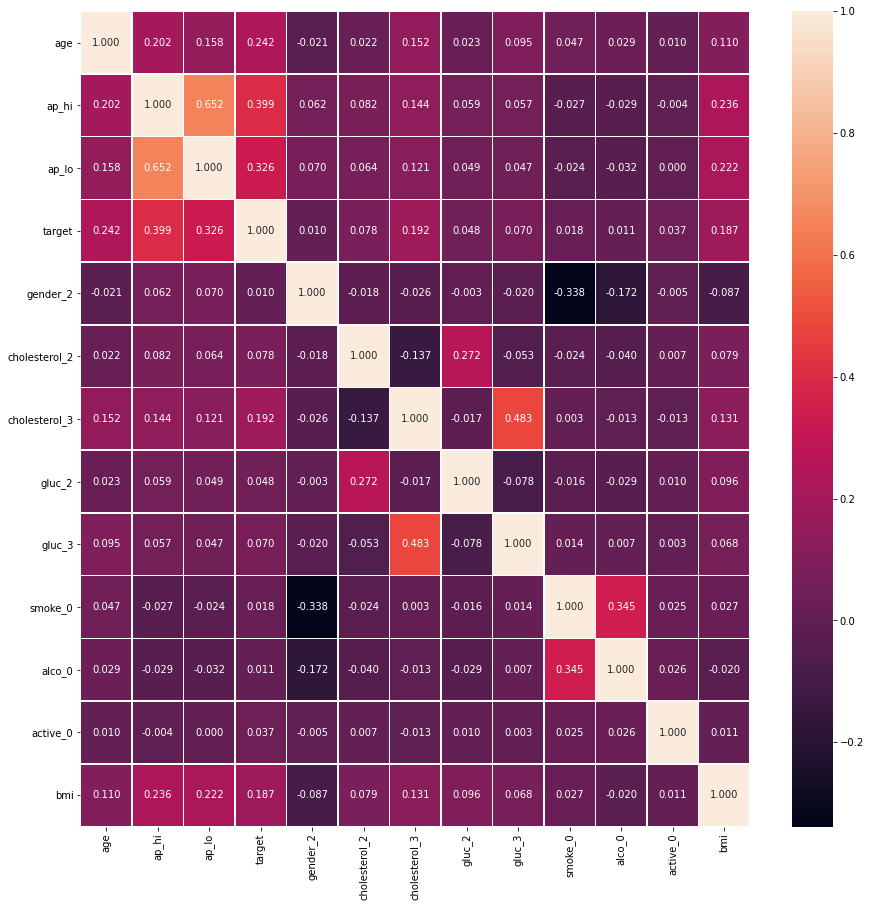

In [36]:
correlation4=df_cleaned.corr()
f, ax = plt.subplots(figsize = (15,15))
sb.heatmap(correlation4, annot=True, fmt=".3f", linewidths=0.5, ax=ax)

In [37]:
X_features=df_cleaned.drop('target', axis=1).copy()
X_features.head()

,age,ap_hi,ap_lo,gender_2,cholesterol_2,cholesterol_3,gluc_2,gluc_3,smoke_0,alco_0,active_0,bmi
0,62.0,130,80,0,1,0,1,0,1,1,0,28.720083
1,40.0,110,70,0,0,0,0,0,1,1,0,26.722873
2,60.0,120,80,0,0,0,0,0,1,1,0,25.711662
3,40.0,120,80,1,0,0,0,0,0,0,0,31.221304
4,64.0,120,80,0,0,0,0,0,1,1,0,25.806452


In [38]:
Y=df_cleaned['target'].copy()

In [39]:
Xtrain,Xval,Ytrain,Yval=train_test_split(X_features, Y, test_size=0.2)    #Splitting into main/validation set
print("Validation shape:",Xval.shape, ", Main shape:",Xtrain.shape)

Validation shape: (13051, 12) , Main shape: (52202, 12)


In [40]:
X_train,X_test,y_train,y_test=train_test_split(Xtrain, Ytrain, test_size=0.25)    #Splitting into train-test set
print("Train shape:",X_train.shape, ", Test shape:",X_test.shape)

Train shape: (39151, 12) , Test shape: (13051, 12)


In [41]:
clf_rf=RandomForestClassifier(n_estimators=1000,min_samples_leaf=60,max_features=.90,n_jobs=-1)

In [42]:
clf_rf.fit(X_train,y_train)

RandomForestClassifier(max_features=0.9, min_samples_leaf=60, n_estimators=1000,
                       n_jobs=-1)

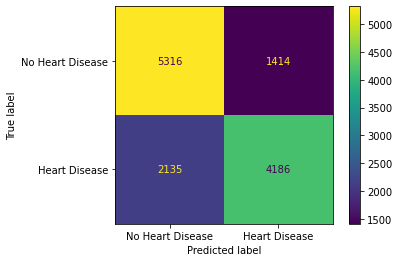

In [43]:
plot_confusion_matrix(clf_rf,
                      Xval,
                      Yval,
                      values_format='d',
                      display_labels=['No Heart Disease', 'Heart Disease']
    
)

In [44]:
pred_val=clf_rf.predict(Xval)
print("Validation accuracy of RF", accuracy_score(Yval, pred_val))

Validation accuracy of RF 0.7280668148034634


In [45]:
print(classification_report(Yval, pred_val))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6730
           1       0.75      0.66      0.70      6321

    accuracy                           0.73     13051
   macro avg       0.73      0.73      0.73     13051
weighted avg       0.73      0.73      0.73     13051



GridSearch for Random Forest

In [46]:
param_grid_rf=[
    {
        'n_estimators':[400,600,800,1000,1200],
        'min_samples_leaf':[40,50,60,70,80]
    }
]

In [47]:
optimal_param_rf=GridSearchCV(
    RandomForestClassifier(),
    param_grid_rf,
    cv=3,
    scoring='recall',
    verbose=2,
    n_jobs=-1

)

In [213]:
optimal_param_rf.fit(xlr_train, y_train)
print(optimal_param_rf.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  4.2min finished


{'min_samples_leaf': 60, 'n_estimators': 1000}


In [48]:
clf_knn=KNeighborsClassifier(n_neighbors=31)

In [49]:
clf_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=31)

In [50]:
y_knn=clf_knn.predict(Xval)
print("Validation accuracy of RF", accuracy_score(Yval,y_knn))

Validation accuracy of RF 0.7171864224963604


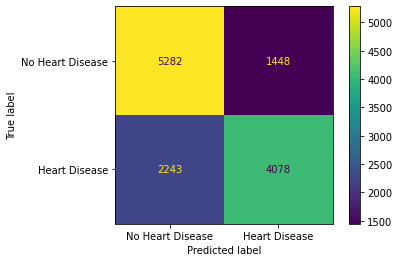

In [51]:
plot_confusion_matrix(clf_knn,
                      Xval,
                      Yval,
                      values_format='d',
                      display_labels=['No Heart Disease', 'Heart Disease']
    
)

In [52]:
print(recall_score(Yval, y_knn))

0.6451510836892896


In [53]:
print(classification_report(Yval,y_knn))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      6730
           1       0.74      0.65      0.69      6321

    accuracy                           0.72     13051
   macro avg       0.72      0.71      0.71     13051
weighted avg       0.72      0.72      0.72     13051



Logistic Regression

In [54]:
xlr_train=scale(X_train)
xlr_test=scale(X_test)
xlr_val=scale(Xval)

In [55]:
clf_lr=LogisticRegression()
clf_lr.fit(xlr_train,y_train)

LogisticRegression()

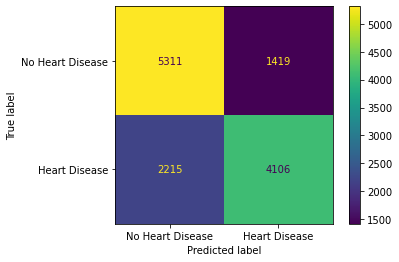

In [56]:
plot_confusion_matrix(clf_lr,
                      xlr_val,
                      Yval,
                      values_format='d',
                      display_labels=['No Heart Disease', 'Heart Disease']
    
)

In [57]:
y_lr=clf_lr.predict(xlr_val)
print("Validation accuracy of RF", recall_score(Yval, y_lr))

Validation accuracy of RF 0.6495807625375731


In [58]:
print(classification_report(Yval, y_lr))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6730
           1       0.74      0.65      0.69      6321

    accuracy                           0.72     13051
   macro avg       0.72      0.72      0.72     13051
weighted avg       0.72      0.72      0.72     13051



Support Vector Machine Classifier

In [59]:
clf_svm=SVC(C=1, gamma=0.1, kernel='rbf')
clf_svm.fit(xlr_train, y_train)

SVC(C=1, gamma=0.1)

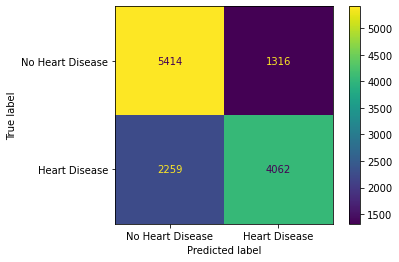

In [60]:
plot_confusion_matrix(clf_svm,
                      xlr_val,
                      Yval,
                      values_format='d',
                      display_labels=['No Heart Disease', 'Heart Disease']
    
)

In [61]:
y_svm=clf_svm.predict(xlr_val)
print("Validation accuracy of SVM", accuracy_score(Yval, y_svm))

Validation accuracy of SVM 0.726074630296529


In [62]:
print(classification_report(Yval, y_svm))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6730
           1       0.76      0.64      0.69      6321

    accuracy                           0.73     13051
   macro avg       0.73      0.72      0.72     13051
weighted avg       0.73      0.73      0.72     13051



Gridsearch for SVM

In [63]:
param_grid=[
    {
        'C':[1,10,100],
        'gamma':['scale',0.1,0.01],
    }
]

In [64]:
optimal_param=GridSearchCV(
    SVC(),
    param_grid,
    cv=3,
    scoring='recall',
    verbose=2,
    n_jobs=-1
)

In [244]:
optimal_param.fit(xlr_train, y_train)
print(optimal_param.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  9.3min finished


{'C': 1, 'gamma': 0.1}


In [65]:
n_estimators=10
clf_svmbag=BaggingClassifier(base_estimator=SVC(C=1,gamma=0.1,kernel='rbf'), oob_score=True, n_jobs=-1)
clf_svmbag.fit(xlr_train, y_train)

C:\Users\adshi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\adshi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\ensemble\_bagging.py:642: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


BaggingClassifier(base_estimator=SVC(C=1, gamma=0.1), n_jobs=-1, oob_score=True)

In [66]:
y_bag=clf_svmbag.predict(xlr_val)

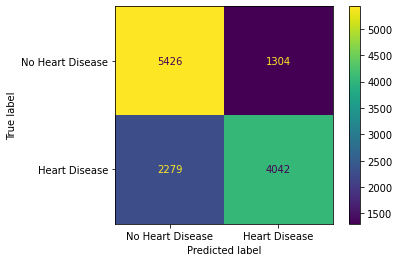

In [67]:
plot_confusion_matrix(clf_svmbag,
                      xlr_val,
                      Yval,
                      values_format='d',
                      display_labels=['No Heart Disease', 'Heart Disease']
    
)

In [68]:
print(classification_report(Yval,y_bag))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6730
           1       0.76      0.64      0.69      6321

    accuracy                           0.73     13051
   macro avg       0.73      0.72      0.72     13051
weighted avg       0.73      0.73      0.72     13051



In [69]:
clf_adasvm=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,min_samples_leaf=60,max_features=.90,n_jobs=-1))

In [ ]:
clf_adasvm.fit(xlr_train,y_train)

In [ ]:
y_ada=clf_adasvm.predict(xlr_val)
plot_confusion_matrix(clf_adasvm,
                      xlr_val,
                      Yval,
                      values_format='d',
                      display_labels=['No Heart Disease', 'Heart Disease']
    
)

In [ ]:
print(classification_report(Yval,y_ada))

Naive Bayes

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
# 2. instantiate CountVectorizer (vectorizer)
vect = CountVectorizer()

In [71]:
vect.fit(X_train)
# 4. transform training datax
X_train_dtm = vect.transform(X_train)

In [72]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)
X_test_dtm

<12x12 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [73]:
from sklearn.naive_bayes import GaussianNB
# 2. instantiate a Multinomial Naive Bayes model
nb = GaussianNB()

In [74]:
nb.fit(X_train, y_train)

GaussianNB()

In [75]:
X_train.shape

(39151, 12)

In [76]:
y_gnb = nb.predict(Xval)

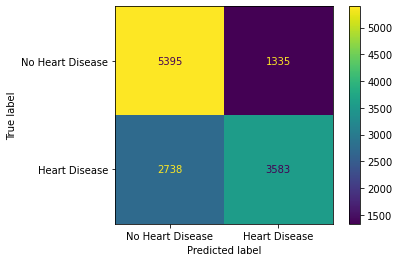

In [77]:
plot_confusion_matrix(nb,
                      Xval,
                      Yval,
                      values_format='d',
                      display_labels=['No Heart Disease', 'Heart Disease']
    
)

In [78]:
print(classification_report(Yval, y_gnb))

              precision    recall  f1-score   support

           0       0.66      0.80      0.73      6730
           1       0.73      0.57      0.64      6321

    accuracy                           0.69     13051
   macro avg       0.70      0.68      0.68     13051
weighted avg       0.69      0.69      0.68     13051



In [79]:
print(precision_score(Yval,y_gnb))

0.7285481903212688
